# Demo of Code Generation from Images

**By: Kevin Chuang**

**SJSU ID: 012480052**

Quick demo of generating code for three images (png format). Then, evaluation of the model by calculating BLEU scores for the demo predictions.

For complete generation of bootstrap code from entirety of the test set images, go to [generated html](results/generated_html). 

To view BLEU scores calculated from the entirety of the test set, go to [BLEU scores](results/bleu_score.txt)

## Code generation

In [1]:
from generator.generate_code import *
from evaluator.evaluate_model import *
from utils.tokenizer import *
from config.config import *
from compiler.classes.Compiler import *
import glob
import os

Using TensorFlow backend.


In [2]:
# Copied some bootstrap screenshots (png format) from test set to demo_dir
demo_img_dir = 'demo/data/demo_images/'
model_path = 'results/'
vocab_path = 'data/code.vocab'
output_dsl = 'demo/generated_dsl'
dsl_mapping = 'compiler/assets/web-dsl-mapping.json'
output_html = 'demo/generated_html'

In [3]:
# Generate the domain specific language first 
dsl_predictions = generate_dsl(demo_img_dir, output_dsl, model_path, tokenizer(vocab_path), CONTEXT_LENGTH, write=True, display=True)

Successfully loaded model and model weights...

Prediction---->

<START> header { btn-inactive , btn-active , btn-inactive , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-orange } } row { quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-orange } } row { double { small-title , text , btn-red } double { small-title , text , btn-orange } } <END> 

Generated DSL code for D3FA2B42-E09E-4F7F-BBEB-6E0553F53205.png...


Prediction---->

<START> header { btn-inactive , btn-inactive , btn-active } row { quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-red } } <END> 

Generated DSL code for E96459E9-5EF6-

In [4]:
# Generate actual bootstrap (HTML/CSS) code from compiling the DSL code
compiled_websites = generate_html(output_dsl, dsl_mapping, output_html)

Saved html file at demo/generated_html/E96459E9-5EF6-46C1-8C30-521CD7E95AB7.html
Saved html file at demo/generated_html/DE8BEB83-425C-45F3-BB63-0905AE781870.html
Saved html file at demo/generated_html/D3FA2B42-E09E-4F7F-BBEB-6E0553F53205.html


In [5]:
print(compiled_websites[0])

<html>
  <header>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">
<style>
.header{margin:20px 0}nav ul.nav-pills li{background-color:#333;border-radius:4px;margin-right:10px}.col-lg-3{width:24%;margin-right:1.333333%}.col-lg-6{width:49%;margin-right:2%}.col-lg-12,.col-lg-3,.col-lg-6{margin-bottom:20px;border-radius:6px;background-color:#f5f5f5;padding:20px}.row .col-lg-3:last-child,.row .col-lg-6:last-child{margin-right:0}footer{padding:20px 0;text-align:center;border-top:1px solid #bbb}
</style>
    <title>Scaffol

In [6]:
from IPython.display import HTML, Image, display

In [7]:
html_files = glob.glob(os.path.join('demo/generated_html/', '*.html'))
png_files = glob.glob(os.path.join(demo_img_dir, '*.png'))

first_html = html_files[0]
first_png = png_files[0]

print('Generated HTML file: %s' % first_html)
print('Actual screenshot of HTML file: %s' % first_png)

Generated HTML file: demo/generated_html/D3FA2B42-E09E-4F7F-BBEB-6E0553F53205.html
Actual screenshot of HTML file: demo/data/demo_images/D3FA2B42-E09E-4F7F-BBEB-6E0553F53205.png


## Original #1

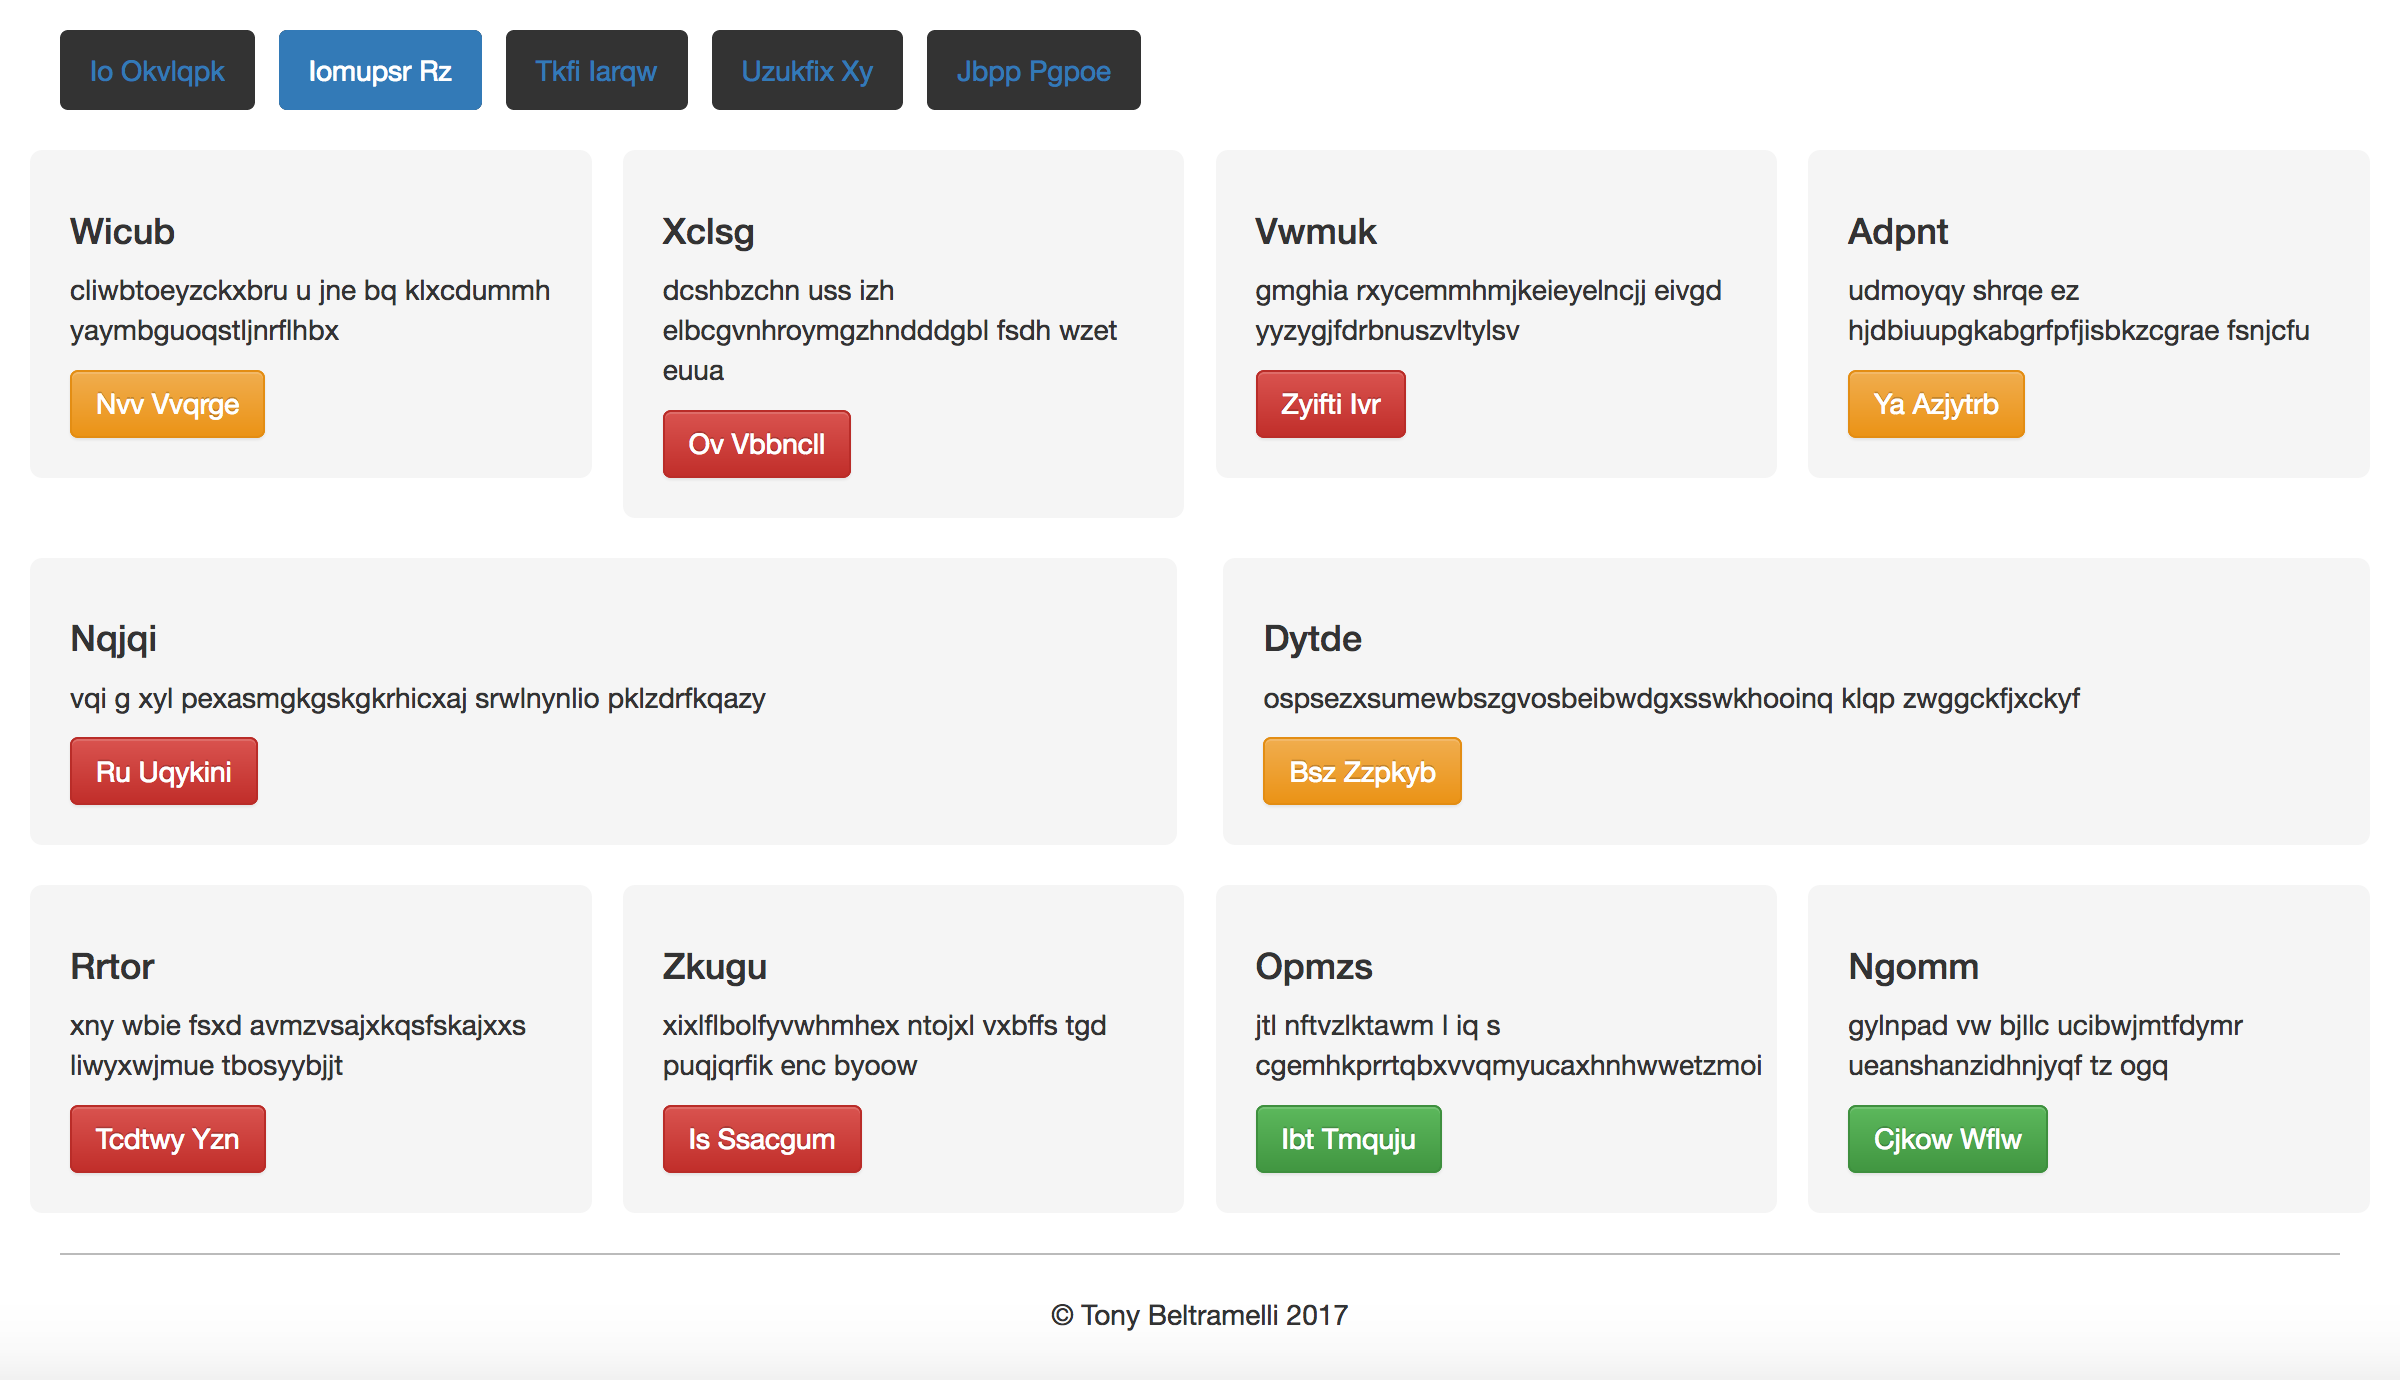

In [8]:
Image(first_png, width=1000, height=1000)

## Generated #1

In [9]:
HTML(filename=first_html)

In [10]:
second_html  = html_files[1]
second_png = png_files[1]

print('Generated HTML file: %s' % second_html)
print('Actual screenshot of HTML file: %s' % second_png)

Generated HTML file: demo/generated_html/E96459E9-5EF6-46C1-8C30-521CD7E95AB7.html
Actual screenshot of HTML file: demo/data/demo_images/E96459E9-5EF6-46C1-8C30-521CD7E95AB7.png


## Original #2

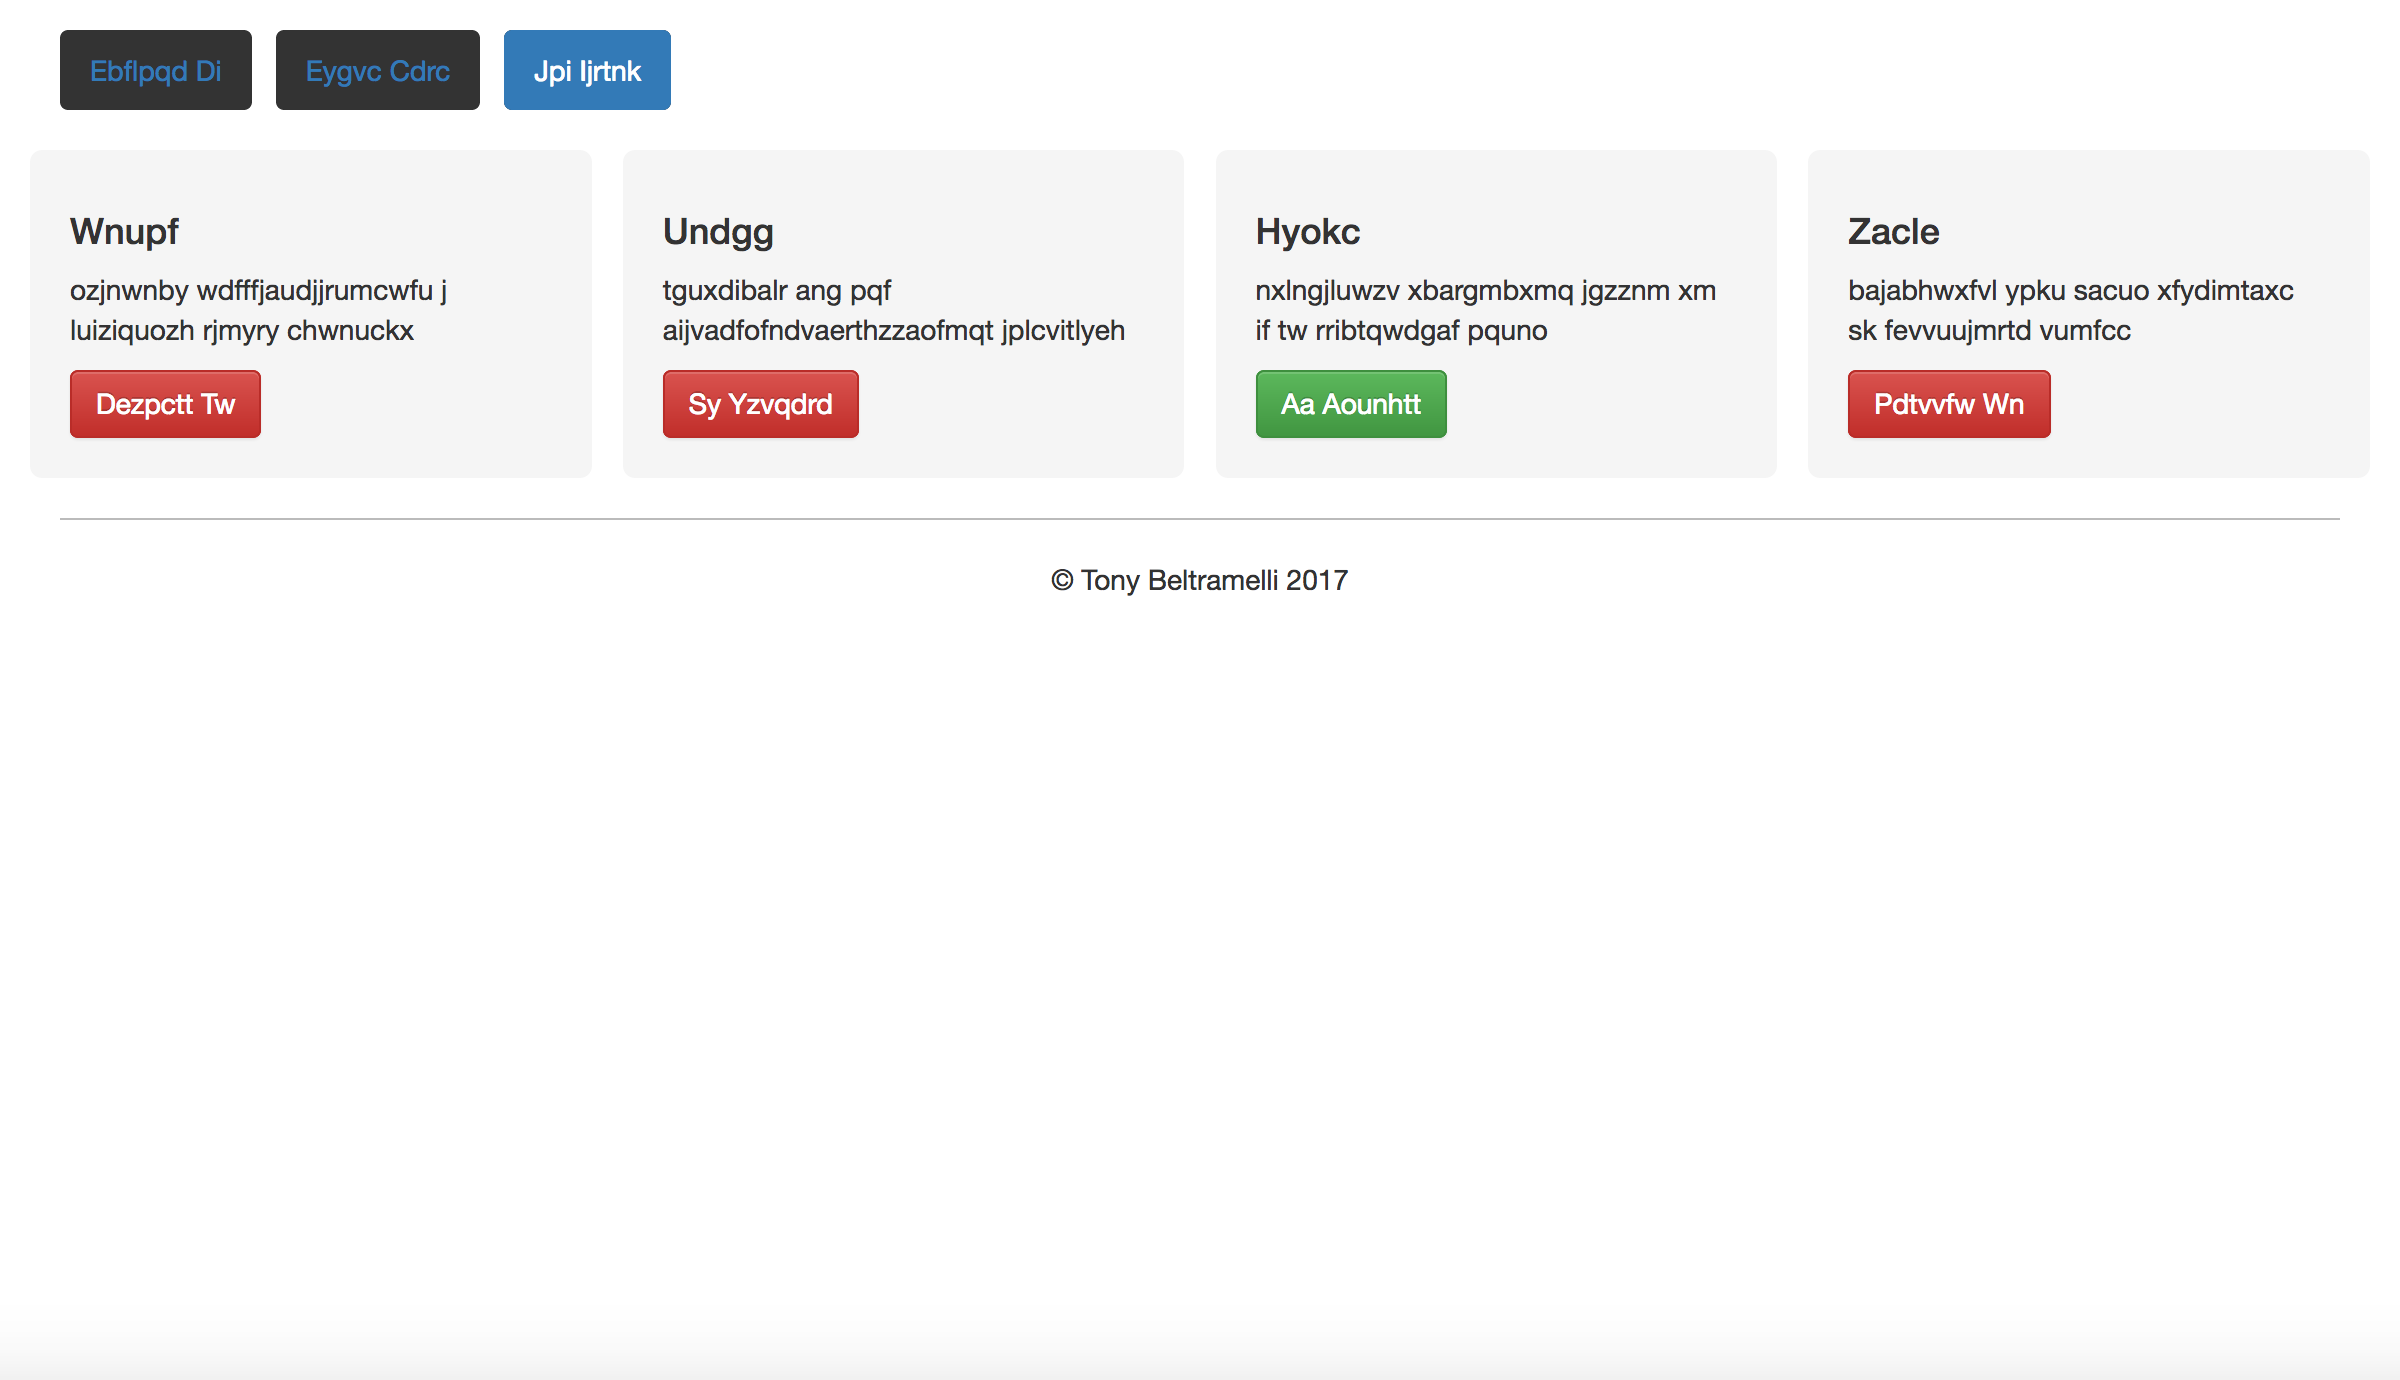

In [11]:
Image(second_png, width=1000, height=1000)

## Generated #2

In [12]:
HTML(filename=second_html)

In [13]:
third_html  = html_files[2]
third_png = png_files[2]

print('Generated HTML file: %s' % third_html)
print('Actual screenshot of HTML file: %s' % third_png)

Generated HTML file: demo/generated_html/DE8BEB83-425C-45F3-BB63-0905AE781870.html
Actual screenshot of HTML file: demo/data/demo_images/DE8BEB83-425C-45F3-BB63-0905AE781870.png


## Original #3

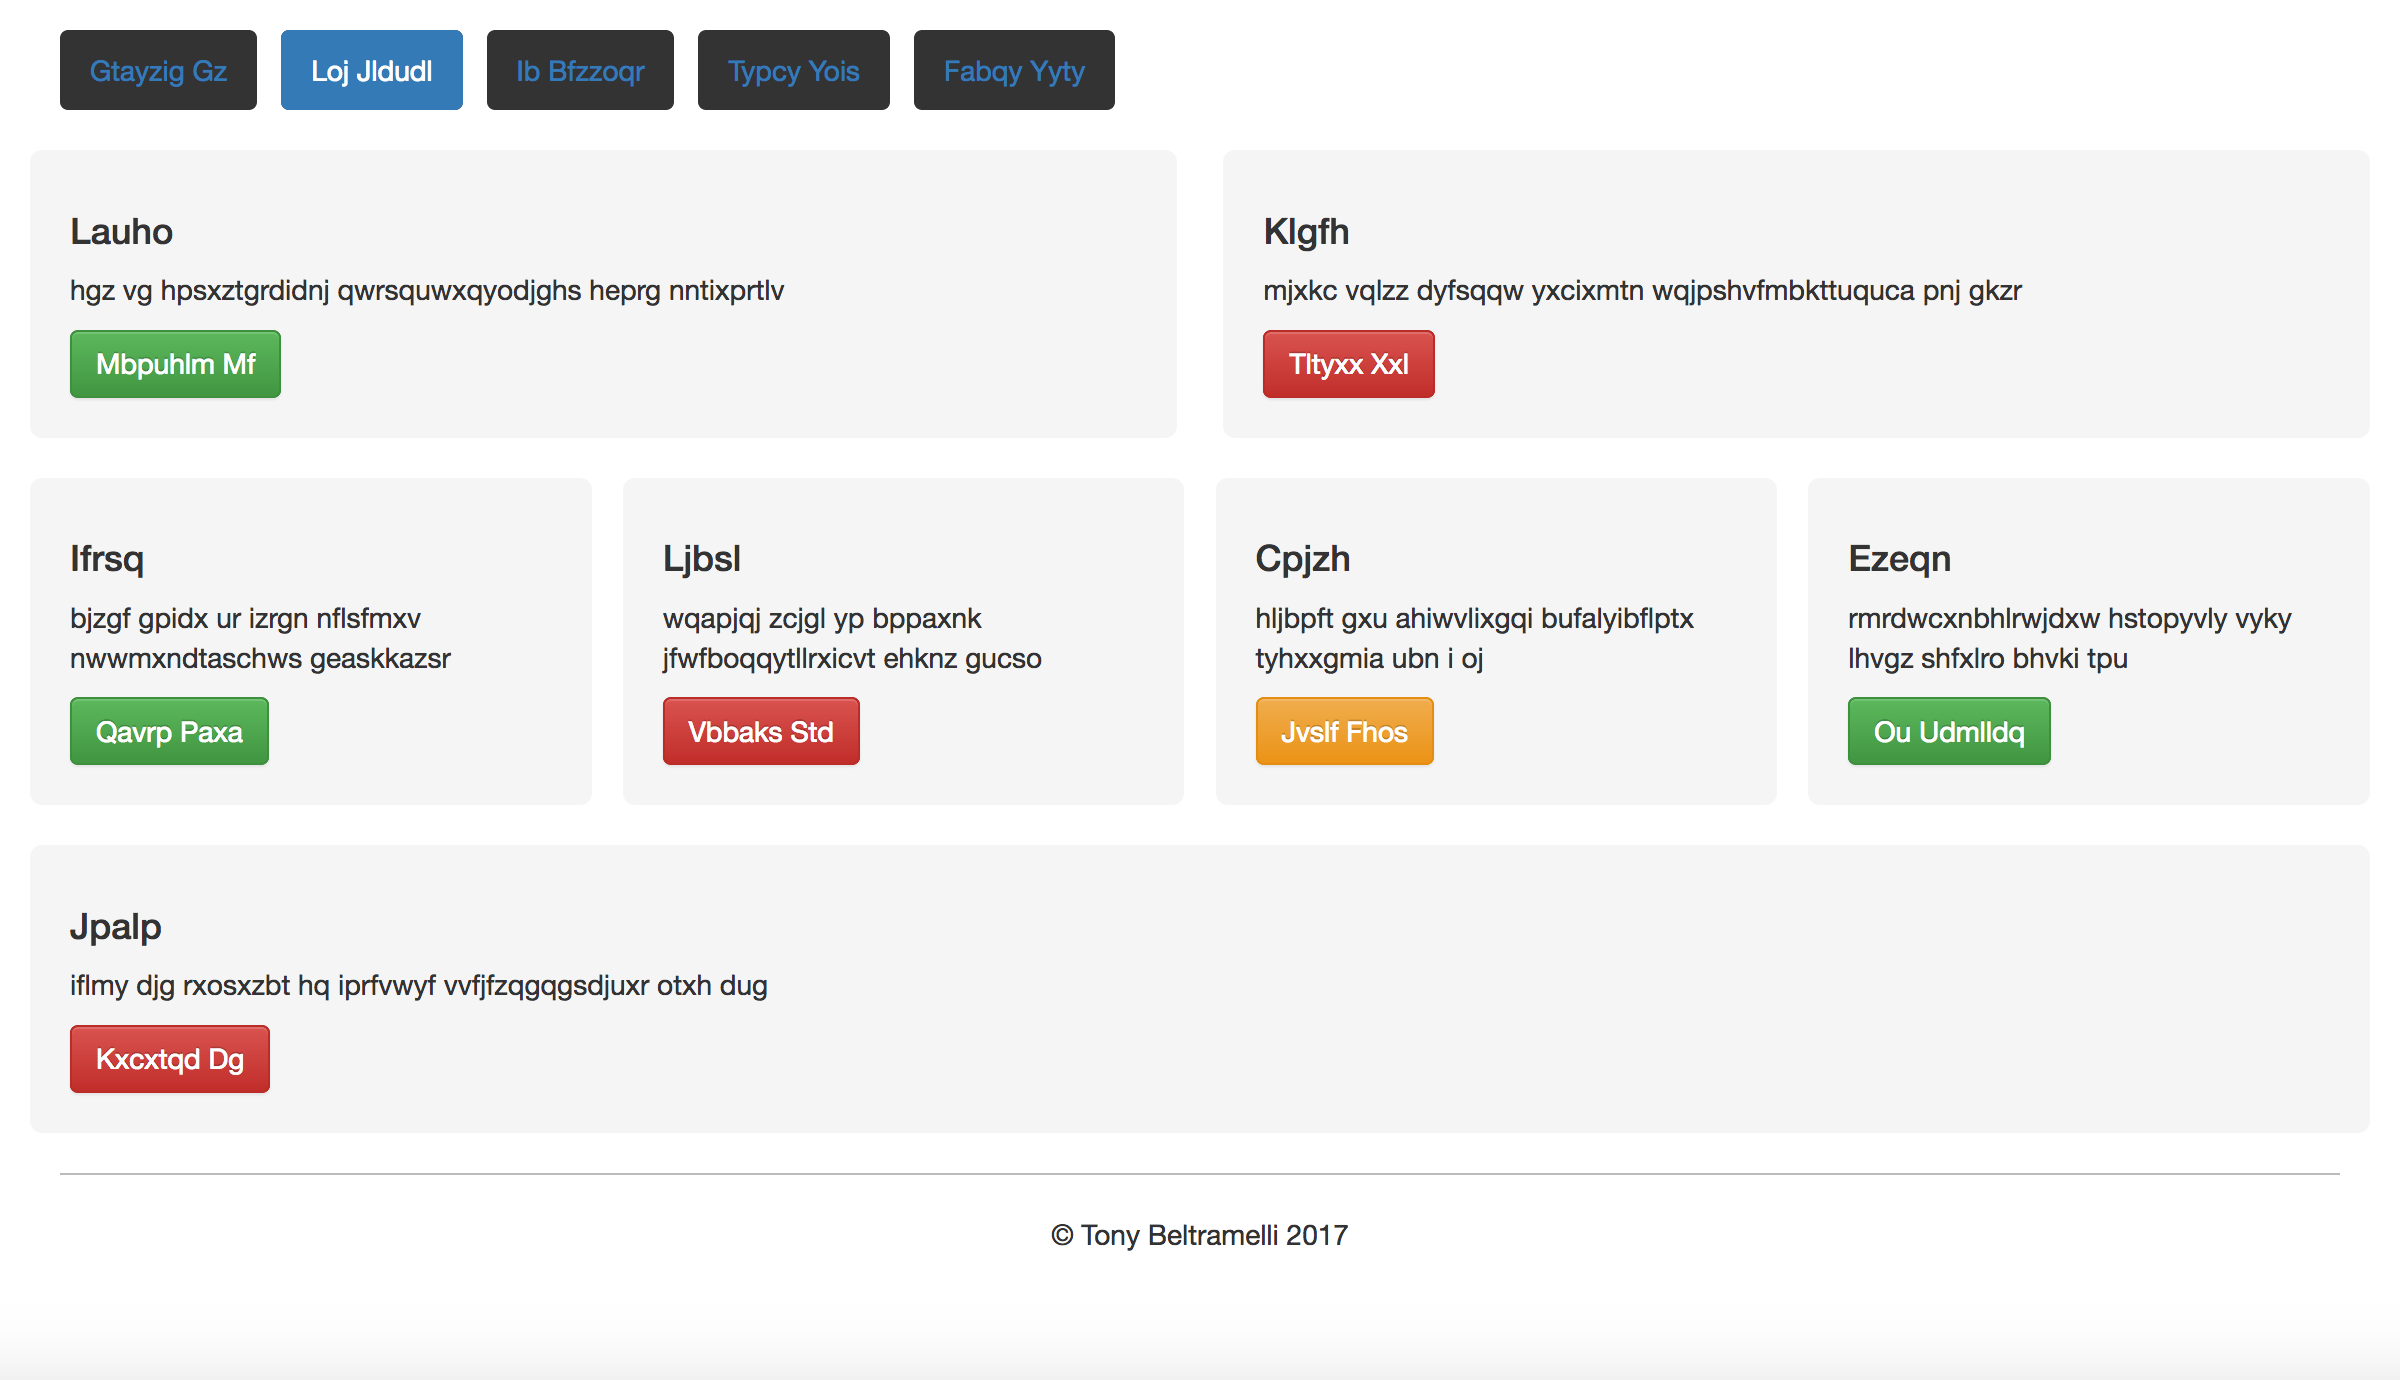

In [14]:
Image(third_png, width=1000, height=1000)

## Generated #3

In [15]:
HTML(filename=third_html)

# Model Evaluation

In [16]:
from nltk.translate.bleu_score import corpus_bleu
from evaluator.evaluate_model import *

demo_data = 'demo/data/demo_data/'

In [17]:
actual, predictions = evaluate_model(demo_data, model_path, tokenizer(vocab_path), CONTEXT_LENGTH, display=True)

Successfully loaded model and model weights...

Prediction---->

<START> header { btn-inactive , btn-active , btn-inactive , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-orange } } row { quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-orange } } row { double { small-title , text , btn-red } double { small-title , text , btn-orange } } <END> 

Actual---->

<START> header { btn-inactive , btn-active , btn-inactive , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-orange } } row { double { small-title , text , btn-red } double { small-title , text , btn-oran

In [18]:
print('BLEU-1: %f' % corpus_bleu(actual, predictions, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual, predictions, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual, predictions, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual, predictions, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.995595
BLEU-2: 0.993330
BLEU-3: 0.990550
BLEU-4: 0.985221
